# **Data Analysis of Hotels in the Hospitality Industry: Insights & Trends**

# Data Exploration and importing dependencies

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df_bookings = pd.read_csv('/content/fact_bookings.csv')

In [104]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


In [105]:
df_bookings.shape

(134590, 12)

In [106]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [107]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [108]:
df_bookings.booking_platform.value_counts()

,count
booking_platform,
others,55066
makeyourtrip,26898
logtrip,14756
direct online,13379
tripster,9630
journey,8106
direct offline,6755


In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='booking_platform'>

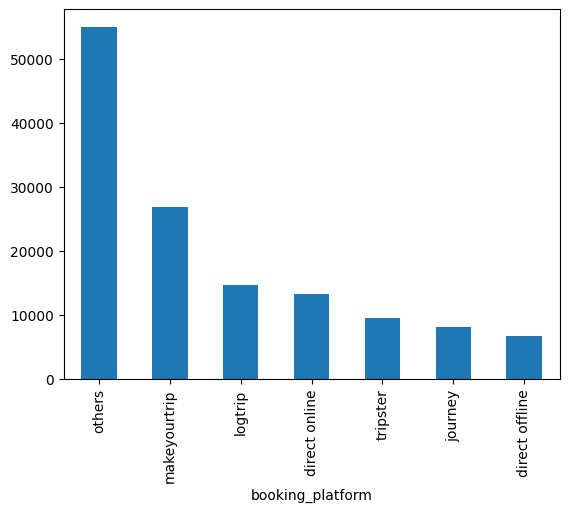

In [110]:
df_bookings.booking_platform.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

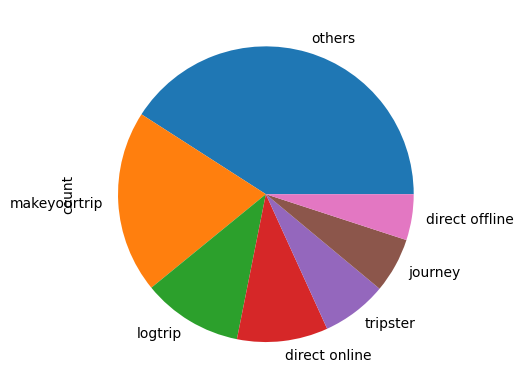

In [111]:
df_bookings.booking_platform.value_counts().plot(kind='pie')

In [112]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [151]:
import pandas as pd
df_aggregate_bookings = pd.read_csv('/content/fact_aggregated_bookings.csv')

In [152]:
df_aggregate_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [153]:
df_aggregate_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


In [154]:
df_aggregate_bookings.property_id.nunique()


25

<Axes: xlabel='property_id'>

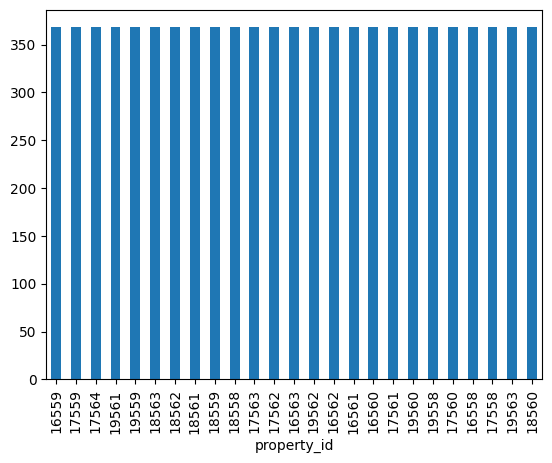

In [155]:
df_aggregate_bookings.property_id.value_counts().plot(kind='bar')


In [156]:
df_aggregate_bookings[df_aggregate_bookings['successful_bookings']>df_aggregate_bookings['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [157]:
df_aggregate_bookings['capacity'].max()

50.0

#Data Cleaning

In [122]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


removed no of guests rows with -ve values

In [123]:
df_bookings = df_bookings[df_bookings['no_guests'] >= 0]

In [124]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134578.000000,134578.000000,56679.000000,1.345780e+05,134578.000000
mean,18061.143315,2.036744,3.619048,1.537804e+04,12696.011822
std,1093.053454,1.031710,1.234970,9.304015e+04,6927.841641
min,16558.000000,1.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [125]:
df_bookings.revenue_generated.max(),df_bookings.revenue_realized.max()

(28560000, 45220)

In [126]:
df_bookings.revenue_generated.mean()

15378.036937686695

In [127]:
df_bookings.revenue_generated.std()

93040.15493143328

In [128]:
higher_limit = df_bookings.revenue_generated.mean() + (3*93040.15493143328)
lower_limit = df_bookings.revenue_generated.mean() - (3*93040.15493143328)

In [129]:
higher_limit

294498.50173198653

In [130]:
lower_limit

-263742.4278566132

In [131]:
df_bookings = df_bookings[(df_bookings.revenue_generated<294498) & (df_bookings.revenue_generated>0)]

In [132]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 13.3+ MB


In [133]:
df_bookings.revenue_realized.describe()

,revenue_realized
count,134573.000000
mean,12695.983585
std,6927.791692
min,2600.000000
25%,7600.000000
50%,11700.000000
75%,15300.000000
max,45220.000000


In [134]:
df_rt4 = df_bookings[df_bookings['room_category']=='RT4']

In [135]:
df_rt4.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,16071.000000,16071.000000,6879.000000,16071.000000,16071.000000
mean,18031.070437,2.105283,3.687164,27465.457034,23439.308444
std,1034.119639,1.207111,1.266633,6310.403418,9048.599076
min,16558.000000,1.000000,1.000000,19000.000000,7600.000000
25%,17559.000000,1.000000,3.000000,19000.000000,19000.000000
50%,18558.000000,2.000000,4.000000,28500.000000,26600.000000
75%,18562.000000,2.000000,5.000000,32300.000000,32300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [136]:
df_rt4.revenue_realized.mean()

23439.308443780723

In [ ]:
df_rt4.revenue_realized.std()

In [137]:
max_out = df_rt4.revenue_realized.mean() + 3*df_rt4.revenue_realized.std()
min_out = df_rt4.revenue_realized.mean() - 3*df_rt4.revenue_realized.std()

In [138]:
max_out

50585.1056709996

In [139]:
min_out

-3706.4887834381516

In [140]:
df_bookings = df_bookings[(df_bookings['revenue_realized']<max_out) & (df_bookings['revenue_realized']>min_out)]

In [158]:
df_aggregate_bookings.isnull().sum()

,0
property_id,0
check_in_date,0
room_category,0
successful_bookings,0
capacity,2


In [159]:
df_aggregate_bookings[df_aggregate_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [160]:
df_aggregate_bookings.capacity.describe()

,capacity
count,9198.000000
mean,25.280496
std,11.442080
min,3.000000
25%,18.000000
50%,25.000000
75%,34.000000
max,50.000000


In [161]:
df_aggregate_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


In [162]:
df_aggregate_bookings.capacity.fillna(round(df_aggregate_bookings.capacity.mean()),inplace=True)

<ipython-input-162-7b05b2a965f3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_aggregate_bookings.capacity.fillna(round(df_aggregate_bookings.capacity.mean()),inplace=True)


In [163]:
df_aggregate_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9200 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


In [170]:
df_aggregate_bookings = df_aggregate_bookings[df_aggregate_bookings['successful_bookings']<=df_aggregate_bookings['capacity']]

# Data Transformation or feature engineering or creating more better columns for analysis

In [171]:
#creating occupancy rate percentage metric column
df_aggregate_bookings['Occ_pct']=(df_aggregate_bookings['successful_bookings']/df_aggregate_bookings['capacity'])*100

In [172]:
df_aggregate_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667
4,16558,1-May-22,RT1,18,19.0,94.736842
5,17560,1-May-22,RT1,28,40.0,70.000000
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.222222
9196,16559,31-Jul-22,RT4,13,18.0,72.222222
9197,17558,31-Jul-22,RT4,3,6.0,50.000000
9198,19563,31-Jul-22,RT4,3,6.0,50.000000


#Insight Generation

**What is the average occupancy rate in each of the room categories**

In [211]:
df_aggregate_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9194 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9194 non-null   int64  
 1   check_in_date        9194 non-null   object 
 2   room_category        9194 non-null   object 
 3   successful_bookings  9194 non-null   int64  
 4   capacity             9194 non-null   float64
 5   Occ_pct              9194 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 760.8+ KB


In [210]:
df_aggregate_bookings.groupby('room_category')['Occ_pct'].mean().round(2)

,Occ_pct
room_category,
RT1,57.89
RT2,58.01
RT3,58.03
RT4,59.28


,Occ_pct
room_category,
RT1,57.89
RT2,58.01
RT3,58.03
RT4,59.28


,Occ_pct
room_category,
RT1,57.89
RT2,58.01
RT3,58.03
RT4,59.28


In [214]:
df_room_type = pd.read_csv('/content/dim_rooms.csv')

In [215]:
df_new = pd.merge(df_aggregate_bookings,df_room_type,left_on='room_category',right_on='room_id')

In [216]:
df_new.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.333333,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.333333,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.666667,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.736842,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.000000,RT1,Standard


In [218]:
df_new.groupby('room_class')['Occ_pct'].mean().round(2)

,Occ_pct
room_class,
Elite,58.01
Premium,58.03
Presidential,59.28
Standard,57.89


**What is the average occupancy rate per city ?**

In [219]:
df_aggregate_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667
4,16558,1-May-22,RT1,18,19.0,94.736842
5,17560,1-May-22,RT1,28,40.0,70.000000
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.222222
9196,16559,31-Jul-22,RT4,13,18.0,72.222222
9197,17558,31-Jul-22,RT4,3,6.0,50.000000
9198,19563,31-Jul-22,RT4,3,6.0,50.000000


In [221]:
df_hotels = pd.read_csv('/content/dim_hotels.csv')

In [222]:
df_m1 = pd.merge(df_aggregate_bookings,df_hotels,on='property_id')

In [223]:
df_m1.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.333333,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.333333,Atliq Bay,Luxury,Bangalore


<Axes: xlabel='city'>

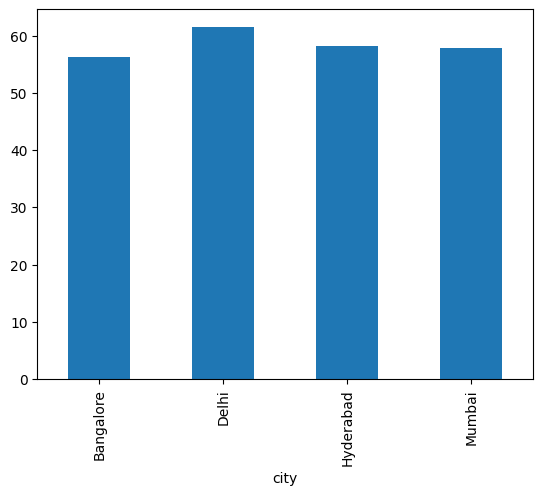

In [225]:
df_m1.groupby('city')['Occ_pct'].mean().plot(kind='bar')

**when was the occupancy better , on a wekday or weekend ?**

In [226]:
df_date = pd.read_csv('/content/dim_date.csv')

In [239]:
df_m2 = pd.merge(df_m1,df_date,left_on='check_in_date',right_on='date')

In [240]:
df_m2.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.724138,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.333333,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.000000,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [241]:
df_m2.groupby('day_type')['Occ_pct'].mean().round(2)

,Occ_pct
day_type,
weekeday,50.88
weekend,72.34


**in the month of june , what was the occupancy rate ?**

In [232]:
df_aggregate_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667
4,16558,1-May-22,RT1,18,19.0,94.736842
5,17560,1-May-22,RT1,28,40.0,70.000000
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.222222
9196,16559,31-Jul-22,RT4,13,18.0,72.222222
9197,17558,31-Jul-22,RT4,3,6.0,50.000000
9198,19563,31-Jul-22,RT4,3,6.0,50.000000


In [243]:
df_june = df_m2[df_m2['mmm yy']=='Jun 22']

In [245]:
df_june

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.666667,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.333333,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.666667,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,RT1,9,19.0,47.368421,Atliq Grands,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,16558,10-Jun-22,RT1,11,19.0,57.894737,Atliq Grands,Luxury,Delhi,10-Jun-22,Jun 22,W 24,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294,17562,30-Jun-22,RT4,3,6.0,50.000000,Atliq Bay,Luxury,Mumbai,30-Jun-22,Jun 22,W 27,weekeday
4295,19563,30-Jun-22,RT4,3,6.0,50.000000,Atliq Palace,Business,Bangalore,30-Jun-22,Jun 22,W 27,weekeday
4296,16560,30-Jun-22,RT4,3,7.0,42.857143,Atliq City,Business,Delhi,30-Jun-22,Jun 22,W 27,weekeday
4297,19558,30-Jun-22,RT4,3,7.0,42.857143,Atliq Grands,Luxury,Bangalore,30-Jun-22,Jun 22,W 27,weekeday


In [246]:
df_june.groupby('city')['Occ_pct'].mean()

,Occ_pct
city,
Bangalore,56.436050
Delhi,62.474136
Hyderabad,58.457791
Mumbai,58.382632


In [247]:
df_bookings_f = pd.merge(df_bookings,df_hotels,on='property_id')

**city wise total revenue**

In [251]:
df_bookings_f.groupby('city')['revenue_realized'].sum()

,revenue_realized
city,
Bangalore,420383550
Delhi,294404488
Hyderabad,325179310
Mumbai,668569251


In [ ]:
#print month by month revenue**

In [252]:
df_ff = pd.merge(df_bookings,df_date,left_on='check_in_date',right_on='date')

In [253]:
df_ff.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type


In [261]:
df_date['date'] = pd.to_datetime(df_date['date'])

In [262]:
df_bookings.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [264]:
df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'],format='mixed')

In [265]:
df_ff = pd.merge(df_bookings,df_date,left_on='check_in_date',right_on='date')

In [266]:
df_ff.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,2022-05-05,May 22,W 19,weekeday


In [268]:
df_ff.groupby('mmm yy')['revenue_realized'].sum()

,revenue_realized
mmm yy,
Jul 22,389940912
Jun 22,377191229
May 22,408375641
